In [16]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [17]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[0.58168219 0.35176582 0.26288646 ... 0.66469655 0.21749526 0.00420012]
 [0.38888908 0.23517634 0.17575521 ... 0.44438911 0.14540849 0.00280803]
 [0.51984651 0.31437138 0.23494033 ... 0.59403603 0.19437444 0.00375363]
 ...
 [0.46281992 0.27988519 0.20916764 ... 0.52887093 0.17305178 0.00334186]
 [0.44046798 0.2663681  0.19906587 ... 0.50332906 0.16469422 0.00318046]
 [0.56731465 0.34307721 0.25639317 ... 0.64827855 0.21212313 0.00409638]]

Noisy Matrix (with Homoscedastic Noise):
[[ 4.93255418e-01  2.05716968e-01  3.57923391e-01 ...  6.25619971e-01
   1.94749775e-01 -1.08060456e-01]
 [ 3.07621371e-01  2.73034279e-01  2.84241394e-01 ...  4.73632929e-01
   1.38338495e-01  6.33771843e-02]
 [ 4.88207822e-01  1.02205844e-01 -3.04397736e-04 ...  5.00601907e-01
   1.64252947e-01  1.18199361e-01]
 ...
 [ 4.93356601e-01  2.24754852e-01  1.59408295e-01 ...  5.65321748e-01
   3.19363399e-01 -1.88576071e-01]
 [ 4.62564351e-01  3.14365338e-01  1.13768595e-01 ...  4.5

In [18]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [19]:
mycebmf=  cEBMF(data= noisy_matrix, prior_F="exp",
                prior_L="exp") 

 

In [20]:
mycebmf.initialise_factors()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([-0.1848, -0.1983,  0.1239,  0.2336, -0.1436,  0.1536, -0.1464,  0.0325,
        -0.2101, -0.0332, -0.0700, -0.2305,  0.2493, -0.0513, -0.3708,  0.0531,
         0.2577, -0.0646, -0.1018, -0.3584, -0.3003, -0.0303, -0.1628,  0.1950,
        -0.0734, -0.0085,  0.2284,  0.1177,  0.2687,  0.0518, -0.1069,  0.1492,
         0.1172,  0.2217,  0.2900, -0.1234,  0.0546, -0.0753, -0.2203, -0.1697,
         0.0575, -0.3263, -0.0403, -0.3687,  0.0369,  0.1147, -0.0279,  0.1726,
         0.0678,  0.1195])
tensor([ 0.3647,  0.0011, -0.2938,  0.2535, -0.1348,  0.2085, -0.1937, -0.0627,
         0.0205, -0.1180,  0.0952,  0.1970, -0.1151, -0.1275, -0.0262,  0.1634,
        -0.0163, -0.3554,  0.1040,  0.0587, -0.0774, -0.0289, -0.0173, -0.1461,
        -0.2413,  0.2499, -0.0807, -0.0438,  0.0006,  0.0063,  0.3160, -0.2188,
         0.0114, -0.1187,  0.0197, -0.0791,  0.0359,  0.1042,  0.0442, -0.1139])


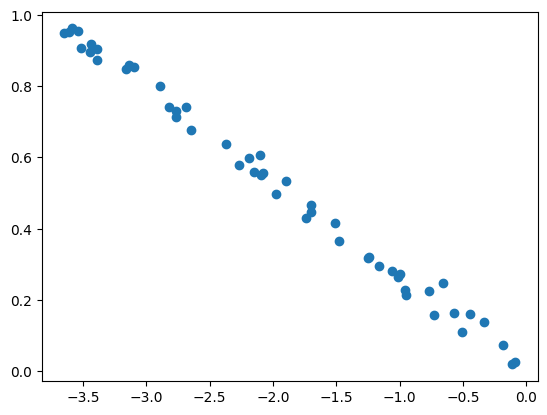

In [21]:
plt.scatter( mycebmf.L[:,0],u)

In [22]:
mycebmf.iter_once()
mycebmf._update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

tensor([[0.0055, 0.0051, 0.0019,  ..., 0.0097, 0.0005, 0.0011],
        [0.0392, 0.0267, 0.0113,  ..., 0.0449, 0.0138, 0.0030],
        [0.0787, 0.0760, 0.0287,  ..., 0.1471, 0.0048, 0.0178],
        ...,
        [0.0061, 0.0042, 0.0018,  ..., 0.0072, 0.0020, 0.0005],
        [0.1507, 0.1451, 0.0549,  ..., 0.2807, 0.0095, 0.0338],
        [0.0031, 0.0023, 0.0009,  ..., 0.0040, 0.0009, 0.0003]])

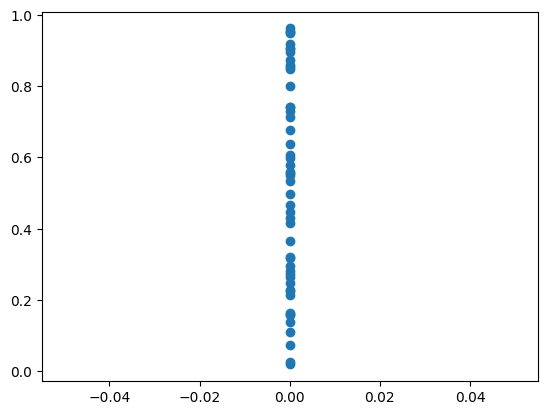

In [23]:
plt.scatter( mycebmf.L[:,0],u)

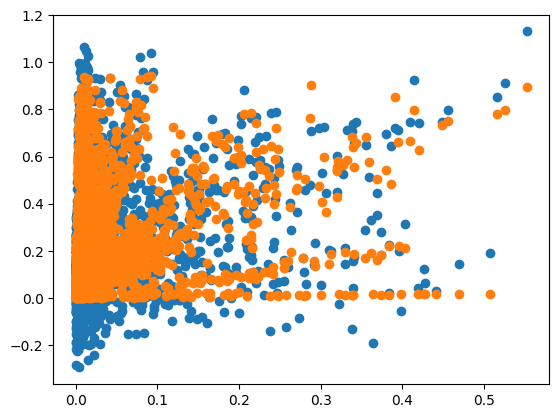

In [24]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [25]:
mycebmf.fit()

CEBMFResult(L=tensor([[0.2944],
        [0.1870],
        [0.2473],
        [0.3065],
        [0.2698],
        [0.3080],
        [0.0902],
        [0.3024],
        [0.0115],
        [0.1262],
        [0.1289],
        [0.2895],
        [0.1933],
        [0.1685],
        [0.3115],
        [0.1794],
        [0.2022],
        [0.0619],
        [0.3004],
        [0.0281],
        [0.2360],
        [0.1485],
        [0.0378],
        [0.1066],
        [0.0103],
        [0.2678],
        [0.0162],
        [0.2936],
        [0.1452],
        [0.0485],
        [0.0812],
        [0.2410],
        [0.0862],
        [0.0560],
        [0.1619],
        [0.1058],
        [0.0809],
        [0.1833],
        [0.1787],
        [0.0846],
        [0.2293],
        [0.0430],
        [0.1771],
        [0.0654],
        [0.0986],
        [0.2642],
        [0.1450],
        [0.2356],
        [0.2261],
        [0.2898]]), F=tensor([[2.0429],
        [1.0979],
        [0.8838],
        [0.2337],
        [0

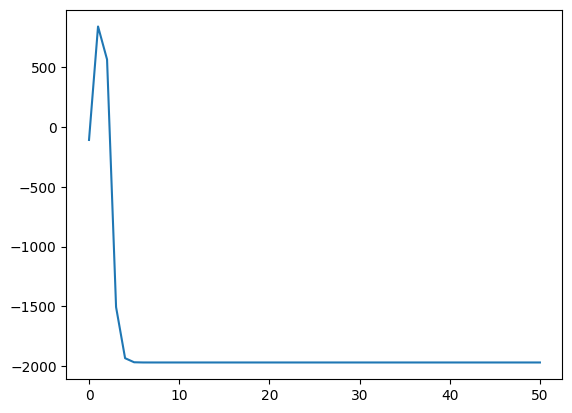

In [26]:
plt.plot(mycebmf.obj)

tensor(0.2250, dtype=torch.float64)

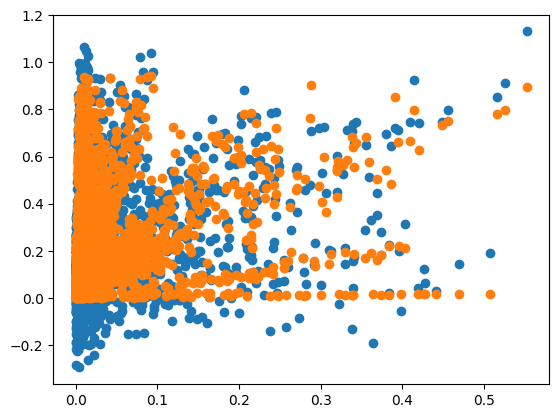

In [27]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [28]:
results =[]
for i in range(50):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix,prior_L="exp",
                    prior_F="exp") 
    mycebmf.initialise_factors()
    mycebmf.fit()
    
    mycebmf._update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

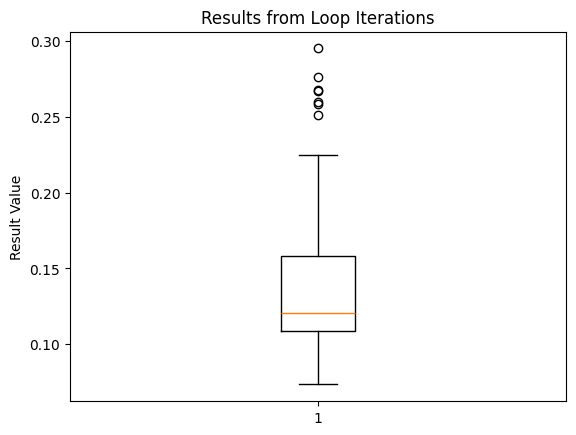

In [29]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [30]:
res= np.asarray(results)
np.mean(res )

np.float64(0.14413090531773445)

In [31]:
mycebmf.obj

[959.9527587890625,
 -40.72034454345703,
 -447.0766296386719,
 -495.3310852050781,
 -495.1624755859375,
 -495.05291748046875,
 -482.07501220703125,
 -499.15625,
 -499.8800048828125,
 -499.51129150390625,
 -499.1932067871094,
 -498.6240539550781,
 -498.3555908203125,
 -498.05596923828125,
 -497.5958251953125,
 -497.0948486328125,
 -496.7950439453125,
 -496.5572509765625,
 -496.13134765625,
 -495.726806640625,
 -495.5027160644531,
 -494.98492431640625,
 -494.84381103515625,
 -494.52374267578125,
 -494.1266174316406,
 -493.8890380859375,
 -493.5680847167969,
 -493.3741760253906,
 -493.0242004394531,
 -492.8379211425781,
 -492.4098205566406,
 -492.1884765625,
 -492.01739501953125,
 -491.82012939453125,
 -491.6572265625,
 -491.34246826171875,
 -491.1019287109375,
 -490.8173828125,
 -490.6229553222656,
 -490.3836364746094,
 -490.0849609375,
 -490.0664367675781,
 -489.78594970703125,
 -489.6507568359375,
 -489.32080078125,
 -489.3262023925781,
 -489.0430603027344,
 -488.91668701171875,
 -488.

tensor(0.1183, dtype=torch.float64)

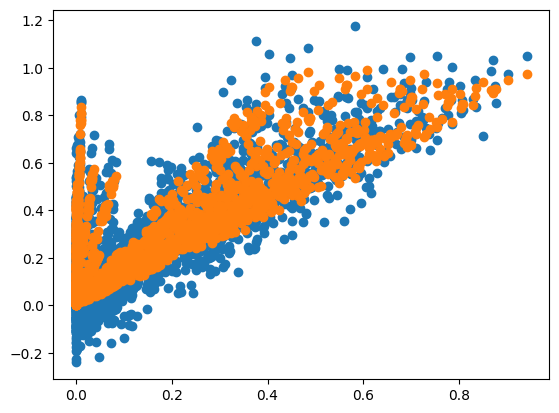

In [33]:
mycebmf._update_fitted_value()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)